In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
import sklearn.metrics as sklm
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib.pyplot as plt

sale_2017 = pd.read_csv("../Week_4_FeatureEngineerning/2017_Sale.csv")


# Fill Null value and filter unknown sales
sale_2017[['Pickup_InStore', 'Pickup_Curbside', 'Local_Delivery']] = sale_2017[
    ['Pickup_InStore', 'Pickup_Curbside', 'Local_Delivery']].fillna(0)

sale_2017.dropna(subset=['2017_sale'], inplace=True)
# print (sale_2017.shape)


C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
cols_input = [
    "Pickup_InStore",
    "Pickup_Curbside",
    "Local_Delivery",
    "POPESTIMATE2017",
    "NPOPCHG_2017",
    "BIRTHS2017",
    "DEATHS2017",
    "NATURALINC2017",
    "INTERNATIONALMIG2017",
    "DOMESTICMIG2017",
    "NETMIG2017",
    "RBIRTH2017",
    "RDEATH2017",
    "RNATURALINC2017",
    "RINTERNATIONALMIG2017",
    "RDOMESTICMIG2017",
    "RNETMIG2017",
]

# print (sale_2017[cols_input].isnull().sum())

X_train_all = sale_2017[cols_input]
Y_train_All = sale_2017['2017_sale']

# Scalar of 2017 Sale
# sale_2017['2017_scaler'] = (Y_train_All-Y_train_All.mean())/(Y_train_All.std())
x_train, x_valid, y_train, y_valid = train_test_split(sale_2017[cols_input],
                                                    sale_2017['2017_sale'],
                                                    test_size=.5,
                                                    random_state=42)

In [12]:
# Scalar
scaler  = StandardScaler()
scaler.fit(X_train_all)
x_train_tf = scaler.transform(x_train)
x_valid_tf = scaler.transform(x_valid)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def print_report(y_actual, y_pred):
    r_squared = r2_score(y_actual, y_pred)
    MAE = mean_absolute_error(y_actual, y_pred)
    MSE = mean_squared_error(y_actual, y_pred)
#    MSLE = mean_squared_log_error(y_actual, y_pred)
    
    print('R^2:%.3f'%r_squared)
    print('MAE:%.3f'%MAE)
    print('MSE:%.3f'%MSE)
#    print('MSLE:%.3f'%MSLE)
    print(' ')
    return r_squared, MAE, MSE

## Random Forest - Feature Importance

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(x_train_tf, y_train)

C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_train_preds = rf.predict(x_train_tf)
y_valid_preds = rf.predict(x_valid_tf)

print('Training:')
sgdc_train_r_squared,sgdc_train_MAE,sgdc_train_MSE, sgdc_train_MSLE = print_report(y_train,y_train_preds)
print('Validation:')
sgdc_train_r_squared, sgdc_train_MAE,sgdc_train_MSE, sgdc_train_MSLE = print_report(y_valid,y_valid_preds)

In [28]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

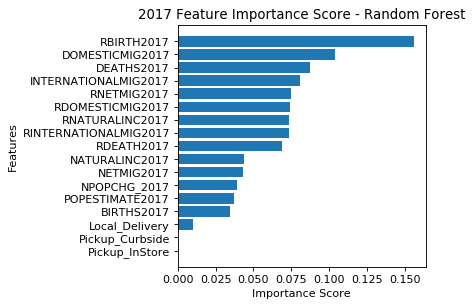

In [29]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(4, 4), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features',)
plt.xlabel('Importance Score')
plt.title('2017 Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

## KNN

In [215]:
from sklearn import neighbors
knn= neighbors.KNeighborsRegressor(5, weights='distance')
knn.fit(x_train_tf, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [216]:
y_train_preds = knn.predict(x_train_tf)
y_valid_preds = knn.predict(x_valid_tf)

print('KNN')
print('Training:')
knn_train_r_squared, knn_train_MAE, knn_train_MSE = print_report(y_train,y_train_preds)
print('Validation:')
knn_valid_r_squared, knn_valid_MAE, knn_valid_MSE = print_report(y_valid,y_valid_preds)

KNN
Training:
R^2:0.983
MAE:171202.098
MSE:211081393243.069
 
Validation:
R^2:-0.045
MAE:2701532.021
MSE:11394289799221.592
 


## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_tf, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_train_preds = lr.predict(x_train_tf)
y_valid_preds = lr.predict(x_valid_tf)

print('Linear Regression')

print('Training:')
lr_train_r_squared,lr_train_MAE,lr_train_MSE = print_report(y_train,y_train_preds)
print('Validation:')
lr_train_r_squared, lr_train_MAE,lr_train_MSE = print_report(y_valid,y_valid_preds)

Linear Regression
Training:
R^2:0.295
MAE:0.659
MSE:0.746
 
Validation:
R^2:-77753.402
MAE:37.756
MSE:70546.733
 


In [9]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [10]:
feature_importances.head()

,importance
Pickup_InStore,0.000065
DOMESTICMIG2017,0.000065
RDOMESTICMIG2017,0.000065
RINTERNATIONALMIG2017,0.000065
RNATURALINC2017,0.000065


In [8]:
lr.coef_

array([ 0.00000000e+00,  8.61406651e+02,  1.63222464e-01, -7.92928152e-07,
        7.58998212e-04, -3.32271332e+01,  3.32272056e+01,  3.32264102e+01,
       -1.00319063e+00, -1.00320536e+00,  1.00245237e+00, -1.57946865e+05,
        1.57946864e+05,  1.57946861e+05, -1.49242758e+06, -1.49242759e+06,
        1.49242759e+06])

## Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(x_train_tf, y_train)

C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [123]:
feature_importances.head()

,importance
RDOMESTICMIG2017,0.172149
RNETMIG2017,0.117728
RESIDUAL2017,0.097540
Local_Delivery,0.047953
DEATHS2017,0.033316


## Random Forest

In [131]:
y_train_preds = rf.predict(x_train_tf)
y_valid_preds = rf.predict(x_valid_tf)

print('Training:')
sgdc_train_r_squared,sgdc_train_MAE,sgdc_train_MSE, sgdc_train_MSLE = print_report(y_train,y_train_preds)
print('Validation:')
sgdc_train_r_squared, sgdc_train_MAE,sgdc_train_MSE, sgdc_train_MSLE = print_report(y_valid,y_valid_preds)

Training:
R^2:0.442
MAE:1225539.472
MSE:6611392630674.750
MSLE:0.071
 
Validation:
R^2:-2.583
MAE:4368342.968
MSE:32319799748154.000
MSLE:0.470
 


In [190]:
import sklearn.tree

In [9]:
## Laso
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}


lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)


print(f'The best value of Alpha is: {lasso_reg.best_params_}')

C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4867396393454153, tolerance: 0.0003922729756992689
  positive)
C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4592917829358834, tolerance: 0.0003715184205052297
  positive)
C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5017116791203955, tolerance: 0.0003793023724488836
  positive)
C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incre

C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.488467858127485, tolerance: 0.00037718002791136784
  positive)
C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3360843045915953, tolerance: 0.0003719892849371932
  positive)
C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4675753288448492, tolerance: 0.0003749734222865311
  positive)
C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incre

C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5366463873832825, tolerance: 0.00036158236001053776
  positive)
C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.463543682529876, tolerance: 0.0003399457435924181
  positive)
C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6378941183277935, tolerance: 0.00038225511631795155
  positive)
C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incr

The best value of Alpha is: {'alpha': 100}


C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [10]:
def score(y_pred):
    return str(math.sqrt(sklm.mean_squared_error(y_test, y_pred)))


In [15]:
from sklearn.metrics import r2_score


lasso_mod=Lasso(alpha= 0.000000000001)
lasso_mod.fit(x_train_tf,y_train)
y_lasso_train=lasso_mod.predict(x_train_tf)
y_lasso_test=lasso_mod.predict(x_valid_tf)

print(f'r2_score train  {r2_score(y_train, y_lasso_train)}')
print(f'r2_score test  {r2_score(y_valid, y_lasso_test)}')

r2_score train  0.20632827995872416
r2_score test  -0.11737348343527754


C:\Users\Bodian\OneDrive\PYTHON\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5733663650171763, tolerance: 0.00039647787230997046
  positive)
